### Sentiment Analysis with Twitter
In order to fetch tweets through tweepy (http://docs.tweepy.org/en/v3.5.0/api.html) Twitter API, one needs to register an App through their twitter account. Follow these steps for the same:

   - Open this link (https://apps.twitter.com/app/new) 
   - Fill the application details. You can leave the callback url field empty.
   - Once the app is created and click the button: ‘Create Twitter  App’ you will be redirected to the app page.
   - Open the ‘Keys and Access Tokens’ tab.
   - Copy ‘Consumer Key’, ‘Consumer Secret’, ‘Access token’ and ‘Access Token Secret’.

You also need to install tweepy and textblob

 `pip install tweepy`
 
 `pip install textblob`. 



In [161]:
!pip install textblob

In [162]:
!pip install tweepy

Replace the `Twitter credentials` with your own that you have obtained above. Replace:
* consumer_key 
* consumer_secret

* access_token 
* access_token_secret

In [163]:
# https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-using-twitter-data/
# https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
# https://medium.datadriveninvestor.com/twitter-sentiment-analysis-with-python-1e2da8b94903

In [164]:
import re
import tweepy
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
## Twitter credentials
consumer_key = "fM4do4wnn7bwvT11uRt7Fg"
consumer_secret = "3jZ4A2L85t6AeYb2arVWCPKx90kR5K4SGhjRFWymQ"
access_token = "331555799-B1rdlBw0cWxexLQuq0lxsKvz64DdqXJcklQ3Zkks"
access_token_secret = "wzcHT2ORj4AgK7QiXljO3UP7lz5f1IeY2M46xgkseoqqH"

## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [165]:
from textblob import TextBlob

def classify(tweet):
    clean_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def get_sentiments(fetched_tweets):
    # empty list to store parsed tweets
    tweets = []
    # parsing tweets one by one
    for tweet in fetched_tweets:
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        #print(tweet.text)
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = classify(tweet.text)
 
        # appending parsed tweet to tweets list
        if tweet.retweet_count > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)
 
    # return parsed tweets
    return tweets

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

def summary(tweets, n):
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    ptweet_size=100*len(ptweets)/len(tweets)
    print("Positive tweets percentage: {} %".format(ptweet_size))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    ntweet_size=100*len(ntweets)/len(tweets)
    print("Negative tweets percentage: {} %".format(ntweet_size))
    # percentage of neutral tweets
    neutral=len(tweets) - len(ntweets) - len(ptweets)
    neutral_size=100*neutral/len(tweets)
    print("Neutral tweets percentage: {} %".format(neutral_size))
 
    # Data to plot
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [ptweet_size, ntweet_size, neutral_size]
    colors = ['gold', 'red', 'lightskyblue']
    explode = (0.1, 0, 0)  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
    plt.axis('equal')
    plt.show()
    
    
    # printing first n positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:n]:
        print(tweet['text'])
 
    # printing first n negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:n]:
        print(tweet['text'])

Positive tweets percentage: 44.086021505376344 %
Negative tweets percentage: 25.806451612903224 %
Neutral tweets percentage: 30.107526881720432 %


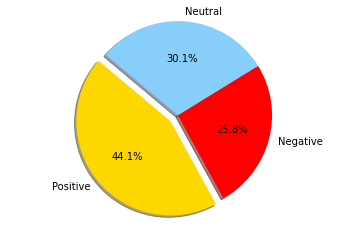



Positive tweets:
@MarkPostma77 First time in August 2020 was not so good—lost taste/smell, aches, and fatigue. 

Second in November… https://t.co/AWBiO0sphR
RT @NHSuk: Your 12-15 year old can now get their first and second dose of the COVID-19 vaccine from a local vaccination centre.
RT @PeteSouza: Hey Ronny, congrats to you! Your congressional district is now in the Top Ten! (#9 out of 435 for Covid deaths per capita.)…
RT @JesseKellyDC: I have no issue with people like this admitting they made a mistake and changed course. None. Good for you.

I have a MAJ…
RT @miriamkp: It’s interesting to consider, re. supply-chain shortages, that COVID doesn’t infect machinery or transport; just people. So e…
RT @_Brad_Schmidt: The @OHAOregon ordered 6 million rapid antigen test kits, saying the first 1.1 million would be here last week.

Only ha…
RT @Tennis: Novak Djokovic has put a statement on social media explaining the events surrounding a PCR test he took on 12/16 that ultimatel…
RT @mdawr

In [167]:
#Classify the sentiments for hashtag 
raw_tweets = api.search(q = 'covid', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

Positive tweets percentage: 35.38461538461539 %
Negative tweets percentage: 10.256410256410257 %
Neutral tweets percentage: 54.35897435897436 %


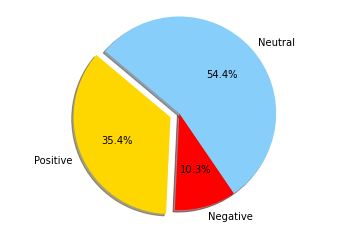



Positive tweets:
@Model3Owners Great explanation!
@engineers_feed He was truly exceptional
Bizarre anti-environment move by govt of California https://t.co/1OwdBNWbxT
@vincent13031925 Tesla is working as fast as possible to support Tesla owners worldwide. 

Sustainable energy affec… https://t.co/fKcfaWhPsy
@moxie Accurate
@cleantechnica Most people have no idea how fast sustainable energy is growing!
@lexfridman Mind-blowing that over 80% of humans have a smart phone
@BLKMDL3 @Tesla It’s our best car ever, along with the Plaid X
@BLKMDL3 Beta 10.9 should be ready in about a week. 

Beta 11 with single city/highway software stack &amp; many other… https://t.co/EYFKwJhNI6
@Redicnomad Masters of Doom is a great book


Negative tweets:
@heyitsyashu Monthly subscription price will rise when FSD goes to wide release
@wintonARK Absolutely. This is just bad math.
@mims If history is any guide, not many will make it past the next recession
@lexfridman Yeah, the smarter someone is, the harder 

In [168]:
# #Classify the sentiments for user @realDonaldTrump
tweets = api.user_timeline(id = '@elonmusk', lang='en',count = 250)
parsed_tweets=get_sentiments(tweets)
summary(parsed_tweets,10)

### Your Turn

Analyse the sentiments on Twitter by brands on a particular product type, for example currently trending topic on vaccines! You need to determine the proper hashtag, or timeline, etc. Prepare a brief report that includes results, graphs and explanation of the results obtained. Also explain if the results are accurate and useful or not. 



### Answer
Analyse the sentiments of #vaccine on Twitter.  
According to the obtained chart, most of the people's views on vaccines on Twitter are positive, and only a small number of people have negative views. This result is useful and can be used to investigate the current people's willingness to be vaccinated. It can also be used To check whether there are problems with the current vaccines has led to the negative thoughts of the public about vaccines, and we can consider whether to propose some new measures to improve them.


Positive tweets percentage: 36.666666666666664 %
Negative tweets percentage: 20.0 %
Neutral tweets percentage: 43.333333333333336 %


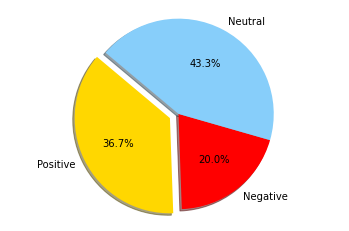



Positive tweets:
RT @acog: Certain strains of #HPV cause genital warts, cervical cancer, and a variety of other cancers. Educate patients on #cervicalhealth…
RT @martinmckee: Is anyone else getting fed up with people applauding Mr Johnson for success of 🇬🇧 vaccine program? I thought it was due to…
RT @NHSuk: Your 12-15 year old can now get their first and second dose of the COVID-19 vaccine from a local vaccination centre.
RT @mdawriter: Why blaming individuals for pandemic problems ignores those who are actually responsible: people in power.

https://t.co/uw7…
RT @MichaelPSenger: Fauci: “Omicron variant will infect ‘just about everybody’ regardless of vaccination status.”

Well, so much for all th…
@sajidjavid You lied about not introducing vaccine passports. It's entirely plausible that wasn't your only lie. Cu… https://t.co/ERdo8UQ3oO
RT @StevenT65674368: Just a gentle reminder, with Omicron as ferocious as a limp vegetable, the vaccine has just become more deadly than th…
@Genxga

In [169]:
#Classify the sentiments for hashtag 
raw_tweets = api.search(q = 'vaccine', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

### Your Turn

Reimplement the above twitter analysis with another sentiment analysis library such as VADER or Flair (in previous worksheet). Compare the results. Are they useful?

### Answer
Using VADER to do sentiment analysis  
Using user id @elonmusk and hashtag #vaccine  
The result is not good  
Compare to previous analysis,the result of using VADER is almost neutral  
So,I think the accuracy of VADER is not good

In [175]:
#!pip install VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def classify(tweet):
    clean_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    # set sentiment
    analyzer = SentimentIntensityAnalyzer()
    if analyzer.polarity_scores(tweet)['neg']>0.5:
      return 'negative'
    elif analyzer.polarity_scores(tweet)['neu']>0.5:
      return 'neutral'
    else :
      return 'positive'

Positive tweets percentage: 8.717948717948717 %
Negative tweets percentage: 1.0256410256410255 %
Neutral tweets percentage: 90.25641025641026 %


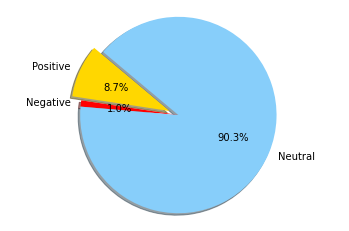



Positive tweets:
@Model3Owners Great explanation!
@Redicnomad Masters of Doom is a great book
nice
@Rainmaker1973 Major improvement!
@nextspaceflight @BocaChicaGal Yes
Lex asks great questions https://t.co/TlyuEGoOVA
Interesting
https://t.co/548FHpnnxU
@nichegamer It’s good
@BLKMDL3 Good idea
@WillFealey Yes


Negative tweets:
@BLKMDL3 @Tesla 🔥
@JohnnaCrider1 Yeah, I mean seriously wth!!


In [182]:
raw_tweets = api.user_timeline(id = '@elonmusk', lang='en',count = 250)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

Positive tweets percentage: 1.075268817204301 %
Negative tweets percentage: 0.0 %
Neutral tweets percentage: 98.9247311827957 %


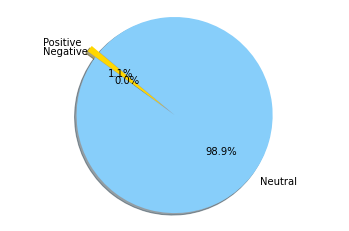



Positive tweets:
Interesting https://t.co/28XvaXU1Nl


Negative tweets:


In [181]:
raw_tweets = api.search(q = 'vaccine', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)